In [1]:
import cv2
import numpy as np
import sys
import glob
import math
import time
import os

### Path of Current Working Directory

In [8]:
sys.argv
path = sys.argv[2]
path

'C:\\Users\\srikanth\\AppData\\Roaming\\jupyter\\runtime\\kernel-6143f0b0-17f4-4145-991f-f05387661dd6.json'

In [9]:
sys.argv

['C:\\Users\\srikanth\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py',
 '-f',
 'C:\\Users\\srikanth\\AppData\\Roaming\\jupyter\\runtime\\kernel-6143f0b0-17f4-4145-991f-f05387661dd6.json']

In [30]:
raw_image = cv2.imread('1.jpg',1)
input_image = np.copy(raw_image)

gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [31]:
gray.shape

(762, 1157)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

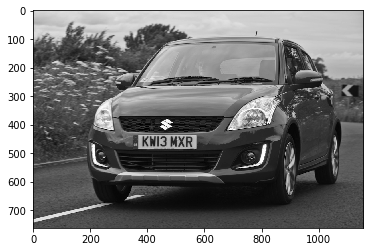

In [33]:
plt.imshow(gray, cmap ='gray')

In [34]:
def enhance(img):
    kernel = np.array([[-1,0,1],[-2,0,2],[1,0,1]])
    return cv2.filter2D(img, -1, kernel)

In [35]:
gray1 = enhance(gray)

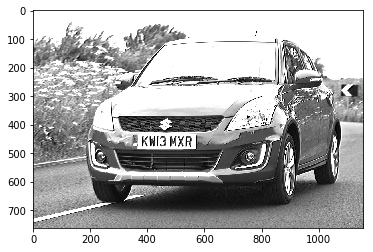

In [36]:
plt.imshow(gray1, cmap = 'gray')

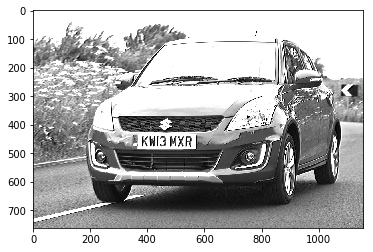

In [37]:
gray2 = cv2.GaussianBlur(gray1, (5,5), 0)
plt.imshow(gray1, cmap = 'gray')

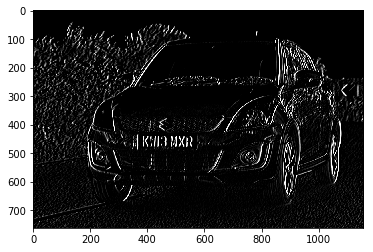

In [38]:
gray3 = cv2.Sobel(gray2, -1, 1, 0)
plt.imshow(gray3, cmap = 'gray')

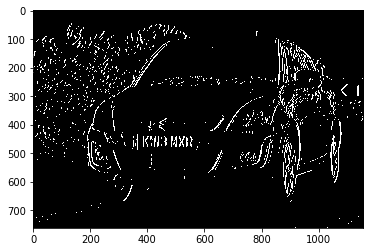

In [39]:
h,sobel = cv2.threshold(gray3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(sobel, cmap = 'gray')

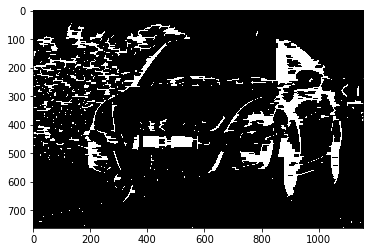

In [40]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, se_shape)
gray4 = cv2.morphologyEx(sobel, cv2.MORPH_CLOSE, se)
ed_img = np.copy(gray4)
plt.imshow(gray4, cmap = 'gray')

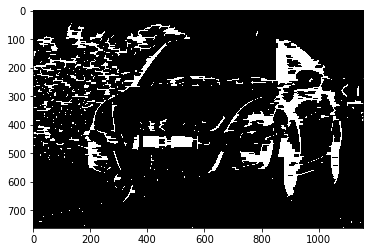

In [27]:
plt.imshow(gray, cmap = 'gray')

In [41]:
_,contours,_=cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [42]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [44]:
def validate_contour(contour, img, aspect_ratio_range, area_range):
    rect = cv2.minAreaRect(contour)
    img_width = img.shape[1]
    img_height = img.shape[0]
    box = cv2.boxPoints(rect) 
    box = np.int0(box)

    X = rect[0][0]
    Y = rect[0][1]
    angle = rect[2] 
    width = rect[1][0]
    height = rect[1][1]

    angle = (angle + 180) if width < height else (angle + 90)

    output=False
    
    if (width > 0 and height > 0) and ((width < img_width/2.0) and (height < img_width/2.0)):
        aspect_ratio = float(width)/height if width > height else float(height)/width
        if (aspect_ratio >= aspect_ratio_range[0] and aspect_ratio <= aspect_ratio_range[1]):
            if((height*width > area_range[0]) and (height*width < area_range[1])):

                box_copy = list(box)
                point = box_copy[0]
                del(box_copy[0])
                dists = [((p[0]-point[0])**2 + (p[1]-point[1])**2) for p in box_copy]
                sorted_dists = sorted(dists)
                opposite_point = box_copy[dists.index(sorted_dists[1])]
                tmp_angle = 90

                if abs(point[0]-opposite_point[0]) > 0:
                    tmp_angle = abs(float(point[1]-opposite_point[1]))/abs(point[0]-opposite_point[0])
                    tmp_angle = rad_to_deg(math.atan(tmp_angle))

                if tmp_angle <= 45:
                    output = True
    return output


In [55]:
rect = cv2.minAreaRect(contour)
img_width = gray4.shape[1]
img_height = gray4.shape[0]
box = cv2.boxPoints(rect) 
box = np.int0(box)

In [56]:
X = rect[0][0]
Y = rect[0][1]
angle = rect[2] 
width = rect[1][0]
height = rect[1][1]

angle = (angle + 180) if width < height else (angle + 90)

output=False

In [57]:
if (width > 0 and height > 0) and ((width < img_width/2.0) and (height < img_width/2.0)):
        aspect_ratio = float(width)/height if width > height else float(height)/width
        if (aspect_ratio >= aspect_ratio_range[0] and aspect_ratio <= aspect_ratio_range[1]):
            if((height*width > area_range[0]) and (height*width < area_range[1])):

                box_copy = list(box)
                point = box_copy[0]
                del(box_copy[0])
                dists = [((p[0]-point[0])**2 + (p[1]-point[1])**2) for p in box_copy]
                sorted_dists = sorted(dists)
                opposite_point = box_copy[dists.index(sorted_dists[1])]
                tmp_angle = 90

                if abs(point[0]-opposite_point[0]) > 0:
                    tmp_angle = abs(float(point[1]-opposite_point[1]))/abs(point[0]-opposite_point[0])
                    tmp_angle = rad_to_deg(math.atan(tmp_angle))

                if tmp_angle <= 45:
                    output = True


In [60]:
list(box)

[array([1156,  761], dtype=int64),
 array([  0, 761], dtype=int64),
 array([0, 0], dtype=int64),
 array([1156,    0], dtype=int64)]

In [61]:
for contour in contours:
    aspect_ratio_range = (2.2, 12)
    area_range = (500, 18000)



    if validate_contour(contour, gray4, aspect_ratio_range, area_range):
        rect = cv2.minAreaRect(contour)  
        box = cv2.boxPoints(rect) 
        box = np.int0(box)  
        Xs = [i[0] for i in box]
        Ys = [i[1] for i in box]
        x1 = min(Xs)
        x2 = max(Xs)
        y1 = min(Ys)
        y2 = max(Ys)

        angle = rect[2]
        if angle < -45:
            angle += 90 

        W = rect[1][0]
        H = rect[1][1]
        aspect_ratio = float(W)/H if W > H else float(H)/W

        center = ((x1+x2)/2,(y1+y2)/2)
        size = (x2-x1, y2-y1)
        M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0);
        tmp = cv2.getRectSubPix(ed_img, size, center)
        tmp = cv2.warpAffine(tmp, M, size)
        TmpW = H if H > W else W
        TmpH = H if H < W else W
        tmp = cv2.getRectSubPix(tmp, (int(TmpW),int(TmpH)), (size[0]/2, size[1]/2))
        __,tmp = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        white_pixels = 0

        for x in range(tmp.shape[0]):
            for y in range(tmp.shape[1]):
                if tmp[x][y] == 255:
                    white_pixels += 1

        edge_density = float(white_pixels)/(tmp.shape[0]*tmp.shape[1])

        tmp = cv2.getRectSubPix(raw_image, size, center)
        tmp = cv2.warpAffine(tmp, M, size)
        TmpW = H if H > W else W
        TmpH = H if H < W else W
        tmp = cv2.getRectSubPix(tmp, (int(TmpW),int(TmpH)), (size[0]/2, size[1]/2))

        if edge_density > 0.5:
            cv2.drawContours(input_image, [box], 0, (127,0,255),2)




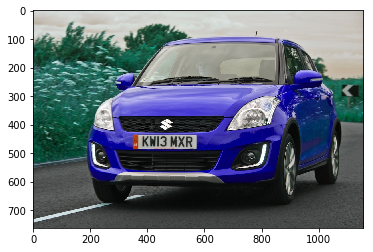

In [62]:
plt.imshow(input_image)

In [63]:
cv2.imshow('image', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
[box]


[array([[1156,  761],
        [   0,  761],
        [   0,    0],
        [1156,    0]], dtype=int64)]